# TP#2: Sentiment Analysis

Sentiment analysis using a collection of nearly half a million Amazon reviews of mobiles phones.

### Import necessary libraries

In [1]:
## Import entire libraries

import pandas as pd
import numpy as np

#library for plotting stuff
import matplotlib.pyplot as plt
#so that plots appear in the same browser window
%matplotlib inline


## Import specific items only from the sklearn library

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

## Data Preparation

### Get raw data

In [3]:
# Read the data from a file
df0 = pd.read_csv('./TP2_data (Amazon Reviews).csv')

In [4]:
# Verify that this data consists of a matrix stored in a Pandas Data Frame
#   containing one row per product and with columns = product attributes.
print(type(df0))
print(df0.shape)
df0.head(10)

<class 'pandas.core.frame.DataFrame'>
(413840, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


In [8]:
#We can also use the info() method to obtain a summary of a pandas Data Frame
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
Product Name    413840 non-null object
Brand Name      348669 non-null object
Price           407907 non-null float64
Rating          413840 non-null int64
Reviews         413778 non-null object
Review Votes    401544 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [5]:
# In order to speed up computation, we'll only use a small random sample
#   of this data comprising 10 % of the rows.
df = df0.sample(frac=0.1, random_state=2137)

print(df.shape)
df.head()

(41384, 6)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
394452,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,This is an upgrade from my two year old phone....,0.0
169898,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,5,Excellent watch thanks it work great as a phon...,8.0
251342,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,It works well with Digitel in Venezuela. I'm g...,3.0
274536,Nokia Lumia 920 32GB Unlocked GSM Windows 8 Sm...,NaN,99.99,4,This is a great phone it has great features an...,0.0
358032,Samsung Galaxy S5 SM-G900H 16GB Factory Unlock...,Samsung,369.99,5,Very good,0.0


### Remove rows that contain missing values

In [10]:
# remove missing values by calling dropna() method
#   arguments:  axis=0, how='any'  <=> remove all rows containing missing value in *any* column
df.dropna(inplace=True, axis=0, how='any')
print(df.shape)

(33332, 6)


In [6]:
?df.dropna

#### Exercise 1
- a. How many rows and columns are there in the **original** matrix?
- b. How many rows and columns are there in the matrix **after** random sampling?
- c. How many rows contain **missing** values in this matrix?
- d. What is the data type of each column in the matrix?

### Visualize and understand the data matrix

#### Summary of numeric attributes

In [15]:
# The describe() method gives a numeric summary of numeric columns (attributes) only
df.describe()

,Price,Rating,Review Votes
count,33332.000000,33332.000000,33332.000000
mean,222.642607,3.824013,1.466909
std,281.093104,1.542062,9.511245
min,1.730000,1.000000,0.000000
25%,75.990000,3.000000,0.000000
50%,139.000000,5.000000,0.000000
75%,265.000000,5.000000,1.000000
max,2566.000000,5.000000,524.000000


#### Distribution of brand names

In [16]:
from collections import Counter
counter = Counter(df['Brand Name']).most_common()

#number of unique brand names
print(len(counter))

259


In [17]:
# Most frequent brand names in the dataset
counter[0:10]

[('Samsung', 6237),
 ('BLU', 5929),
 ('Apple', 5674),
 ('LG', 2168),
 ('BlackBerry', 1525),
 ('Nokia', 1521),
 ('Motorola', 1342),
 ('HTC', 1249),
 ('CNPGD', 1239),
 ('Sony', 784)]

#### Distribution of product names

In [18]:
counter2 = Counter(df['Product Name']).most_common()

print(len(counter2))

2566


In [19]:
# 5 Most frequent product names in the dataset
counter2[0:5]

[('Samsung Galaxy S Duos II S7582 DUAL SIM Factory Unlocked International Version - Black',
  127),
 ('BLU Studio 5.0 C HD Unlocked Cellphone, Black', 119),
 ('Samsung Galaxy S4 i9505 16GB LTE Unlocked International Version White',
  114),
 ('BLU Dash JR 4.0K Android 4.2, 2MP - Unlocked (Silver)', 113),
 ('Motorola Moto E (1st Generation) - Black - 4 GB - US GSM Unlocked Phone',
  110)]

#### Distribution of rating values

In [20]:
gR = df.groupby('Rating').size()
print(type(gR))
gR

<class 'pandas.core.series.Series'>


Rating
1     5727
2     2035
3     2612
4     4961
5    17997
dtype: int64

<Container object of 5 artists>

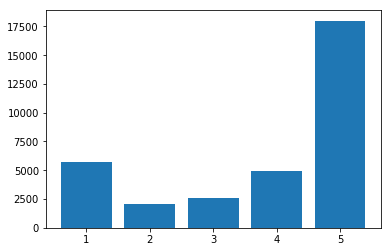

In [21]:
plt.bar(gR.index, gR)

### Create new binary ratings variable

In [9]:
# Remove any 'neutral' ratings equal to 3
df = df[df['Rating'] != 3]

print(df.shape)

(38177, 6)


In [11]:
# Create new binary ratings variable:
#   = 1 if rating >= 4
#   = 0 if rating <= 2

z = np.where(df['Rating'] > 3, 1, 0)
print(type(z))
print(z.shape)
df['Rating_Binary'] = z

<class 'numpy.ndarray'>
(38177,)


C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df.describe()

,Price,Rating,Review Votes,Rating_Binary
count,37611.000000,38177.000000,37057.000000,38177.000000
mean,230.369785,3.888807,1.502766,0.745894
std,273.654341,1.592932,9.229348,0.435363
min,1.730000,1.000000,0.000000,0.000000
25%,79.990000,2.000000,0.000000,0.000000
50%,149.990000,5.000000,0.000000,1.000000
75%,276.370000,5.000000,1.000000,1.000000
max,2566.000000,5.000000,524.000000,1.000000


In [13]:
# Distribution of values in the 'Rating_Binary' column
df.groupby('Rating_Binary').size()

Rating_Binary
0     9701
1    28476
dtype: int64

In [14]:
# Some examples with low ratings
df[df['Rating_Binary'] == 0].head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Rating_Binary
359041,Samsung Galaxy S5 SM-G900T GSM Unlocked Cell P...,Samsung,195.99,1,I bought this phone on March 17 and after usin...,3.0,0
211518,LG Electronics G3 D855 32GB Unlocked Internati...,LG Electronics,561.11,1,"one of the phones we got is haveing issues , i...",0.0,0
22017,"Apple iPhone 5 Unlocked Cellphone, 32GB, White",Apple,265.00,2,didn't work for me it would shut off with 40% ...,1.0,0
157588,BLU Tank II T193 Unlocked GSM Dual-SIM Cell Ph...,BLU,18.93,1,WINE WITH PHONE CHARGER DAMAGED,0.0,0
65132,Apple iPhone 6s 128 GB International Warranty ...,"Amazon.com, LLC *** KEEP PORules ACTIVE ***",749.99,1,"The cellphone is not unlocked, i had to write ...",0.0,0


In [15]:
# Some examples with high ratings
df[df['Rating_Binary'] == 1].head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Rating_Binary
394452,Sony XPERIA Z2 D6503 FACTORY UNLOCKED Internat...,NaN,244.95,5,This is an upgrade from my two year old phone....,0.0,1
169898,CNPGD [U.S. Warranty] All-in-1 Smartwatch and ...,CNPGD,49.99,5,Excellent watch thanks it work great as a phon...,8.0,1
251342,Motorola Moto E (1st Generation) - Black - 4 G...,Motorola,89.99,5,It works well with Digitel in Venezuela. I'm g...,3.0,1
274536,Nokia Lumia 920 32GB Unlocked GSM Windows 8 Sm...,NaN,99.99,4,This is a great phone it has great features an...,0.0,1
358032,Samsung Galaxy S5 SM-G900H 16GB Factory Unlock...,Samsung,369.99,5,Very good,0.0,1


#### Exercise 2
- a. How many products have a "neutral" rating, i.e. a rating of 1?
- b. How many products have a "positive" rating, i.e. rating of 4 or 5?
- c. How many products have a "negative" rating, i.e. rating of 1 or 2?
- d. How many products of the brand name **Apple**  have a "positive" rating and how many have a "negative" rating?   *Hint*: use ``df['Brand Name'] == 'Apple'`` and the ``groupby()`` method   (there is a similar example above ...)

### Split data into train and test sets

In [16]:
?train_test_split

In [18]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], 
                                                    df['Rating_Binary'], 
                                                    random_state=591)

In [19]:
print(type(X_train))
print(X_train.shape)

<class 'pandas.core.series.Series'>
(28632,)


In [20]:
print(type(y_train))
print(y_train.shape)

<class 'pandas.core.series.Series'>
(28632,)


In [21]:
print(type(X_test))
print(X_test.shape)

<class 'pandas.core.series.Series'>
(9545,)


In [22]:
X_train.head()

218215    I love this phone! The screen is large and bri...
158226          Despite the low price is a good cell phone.
147464                                              perfect
332159                              This phone's a beast!!!
330481                                   Love my new phone!
Name: Reviews, dtype: object

In [23]:
y_train.head()

218215    1
158226    1
147464    1
332159    1
330481    1
Name: Rating_Binary, dtype: int32

In [37]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### Exercise 3
- a. What kind of text **documents** do the training and test sets contain?
- b. How many documents does each one of them contain?

## Sentiment analysis based on BOW model with word occurrences

### Feature extraction

- *Feature extraction* means representing raw text documents as numerical *feature vectors*.
- In the simple BOW model, feature vector = number of word occurrences for each document and each vocabulary word.
- We will do this using the ``CountVectorizer`` class: first we'll **tokenize** the documents and extract the vocabulary set, and then we determine the feature vectors.

#### Tokenize documents & build vocabulary set

In [50]:
vect = CountVectorizer()

# Fit the CountVectorizer to the training data
#  i.e. learn the vocabulary (distinct words) of the input corpus
vect.fit(X_train)
len(vect.get_feature_names())

19333

#### Exercise 4
How many words are there in the vocabulary set?  *Hint*: use the get_feature_names() method

#### Construct document-term matrix
- This matrix contains the *feature vectors* of a given set of raw documents.
- For the simple BOW model, feature vector = number of word occurrences.

In [51]:
# the document-term matrix for the training corpus
X_train_vectorized = vect.transform(X_train)
print(type(X_train_vectorized))
print(X_train_vectorized.shape)

# the document-term matrix for the test corpus
X_test_vectorized = vect.transform(X_test)
print(type(X_test_vectorized))
print(X_test_vectorized.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(23040, 19333)
<class 'scipy.sparse.csr.csr_matrix'>
(7680, 19333)


In [54]:
# Number of non-zero elements in document-term matrix of training corpus
print(X_train_vectorized.nnz)
print(X_train_vectorized)

612535


AttributeError: n not found

#### Exercise 5
What is the proportion of non-zero elements in ``X_train_vectorized`` document-term matrix?

#### Analyze document-term matrix

In [55]:
# Number of training documents that contain each word (called document frequency)
doc_freq = np.array((X_train_vectorized > 0).sum(0))
print(doc_freq.shape)
print(np.amin(doc_freq))
print(np.amax(doc_freq))

(1, 19333)
1
11470


In [56]:
# Proportion of training documents that contain each word (called relative document frequency)
n,m = X_train_vectorized.shape
rel_doc_freq = np.array((X_train_vectorized > 0).sum(0)/n)

print(rel_doc_freq.shape)
print(np.amin(rel_doc_freq))
print(np.amax(rel_doc_freq))

(1, 19333)
4.34027777778e-05
0.497829861111


In [57]:
# Number of unique words in each training document
words_per_doc = np.array((X_train_vectorized > 0).sum(1))
print(words_per_doc.shape)
print(np.amin(words_per_doc))
print(np.amax(words_per_doc))

(23040, 1)
0
746


#### Exercise 6
- a. How many training documents contain 0 words?
- b. How many training documents contain 1 unique word?
- c. How many training documents contain 2 unique words?

*Hint*: you can either use ``np.sum`` method with the variable ``words_per_doc`` ...

(array([  2.12290000e+04,   1.39000000e+03,   2.69000000e+02,
          8.60000000e+01,   3.50000000e+01,   1.50000000e+01,
          8.00000000e+00,   1.00000000e+00,   6.00000000e+00,
          1.00000000e+00]),
 array([   0. ,   74.6,  149.2,  223.8,  298.4,  373. ,  447.6,  522.2,
         596.8,  671.4,  746. ]),
 <a list of 10 Patch objects>)

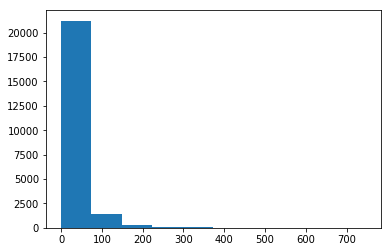

In [58]:
# Plot histogram of number of unique words in each document
plt.hist(words_per_doc)

In [60]:
# Plot histogram of number of document frequency of words
# plt.hist(doc_freq)

IndentationError: unexpected indent (<ipython-input-60-33736af6a20b>, line 2)

#### Remove documents with 0 words from training corpus

In [61]:
# Select documents that contain 0 words
idx = np.where(words_per_doc == 0)[0]
# Show all those documents
X_train.iloc[idx]

75508         A+
47313       👍👍👍👍
285867     ☆☆☆☆☆
408075         😆
43585       👍👍👍👍
10955       A+++
44973          👍
22788          👍
45094          A
115394         😊
115716         😊
260138        :)
254217      A+++
395570       ;-)
11131          👍
23123          👍
131691        A+
299856        A+
37905       A+++
336372       A++
48199          👍
51600         👌🏾
390306        ;)
10455       A+++
48870          A
181507      👍👍👍👍
255212        A+
316171      😀😀😀😀
69510          💯
49963       👍👍👍👍
329788    🌟🌟🌟🌟🌟🌟
23488          B
181525      👍👍👍👍
137930      A+++
71800          💯
57097       A-1!
69265       👍🏻👌🏻
219539        :D
119818        A+
211407         😊
62107        A++
107247      👌🏻👌🏻
408074         😊
63844        A++
19126        😍🙌🏻
331835        A+
283795        :)
70361       A+++
33501          B
398505       :-)
19739         A+
159531         👍
57582          👍
Name: Reviews, dtype: object

#### Exercise 7
Based on the output of the above cell, why do some documents contain zero words?

In [62]:
## Remove rows from training data that contain no words
X_train = X_train.drop(X_train.index[idx])
y_train = y_train.drop(y_train.index[idx])
print(X_train.shape)

(22987,)


In [63]:
# re-compute the document-term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized.shape

(22987, 19333)

In [64]:
# verify results: re-compute number of words in each document
words_per_doc = np.array((X_train_vectorized > 0).sum(1))
print(words_per_doc.shape)
print(np.amin(words_per_doc))
print(np.amax(words_per_doc))

(22987, 1)
1
746


### Build classification model using Logistic Regression
We are going to  to build a classification model using the feature vectors of the training documents (which are stored in the variable ``X_train_vectorized``) and their corresponding true sentiment categories (which are stored in the variable ``y_train``).

In [65]:
# Train the model using LR method
LR_model = LogisticRegression()
LR_model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Test the classification model
We'll use the obtained LR model to predict sentiment categories (classes) of test documents.

In [66]:
# Use this model to predict the sentiment category of test documents
LR_predictions = LR_model.predict(X_test_vectorized)
print(type(LR_predictions))
print(LR_predictions.shape)

<class 'numpy.ndarray'>
(7680,)


In [71]:

np.sum(LR_predictions[:1000] == np.array(y_test[:1000]))

941

#### Exercise 8
- For the first 30 test documents, how many predictions are wrong?  *Hint*: see the output of the above cell.
- For the first 1000 test documents, how many predictions are wrong?  *Hint*: use an expression of the form: ``np.sum(a == b)`` where a and b are two arrays of the same size.
- What is the *classification rate* for the entire test corpus?

In [ ]:
# Actually, we can also obtain the prediction probabilities for each sentiment category
LR_pred_prob = LR_model.predict_proba(X_test_vectorized)
print(type(LR_pred_prob))
print(LR_pred_prob.shape)

# the prediction probabilities for the first 10 test documents
print(LR_pred_prob[:10,:])

#### Evaluate performance of classification model

In [ ]:
## calculate model's classification rate on the test corpus

LR_classif_rate = accuracy_score(y_test, LR_predictions)
LR_classif_rate

####  Interpretation of model's coefficients (parameters)
Which vocabulary words are most important in our classification model?

In [ ]:
# first get LR model's coefficient (there is one coefficient per vocabulary word)
coefs = LR_model.coef_[0]
print(coefs.shape)

# Sort these coefficient values in ascending order
sorted_coef_index = coefs.argsort()  #sort by actual value
sorted_coef_index_2 = abs(coefs).argsort()  #sort by absolute value

In [ ]:
# Display the 10 smallest and 10 largest coefficients

#feature_names = vect.get_feature_names()
feature_names = np.array(vect.get_feature_names())

print('Smallest Coefs of LR model:\n')
print(' Coefficient values:\n{}\n'.format(coefs[sorted_coef_index[:10]]))
print(' Feature names:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))

print('Largest Coefs of LR model:\n')
print(' Coefficient values: \n{}'.format(coefs[sorted_coef_index[:-11:-1]]))
print(' Feature names: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

print('Smallest abs(Coefs):\n')
print(' Coefficient values:\n{}\n'.format(coefs[sorted_coef_index_2[:10]]))
print(' Feature names:\n{}\n'.format(feature_names[sorted_coef_index_2[:10]]))

### Build classification model using Naive Bayes

In [ ]:
## Build Naive Bayes classification model

NB_model = MultinomialNB()
NB_model.fit(X_train_vectorized, y_train)

In [ ]:
## Use this model to predict sentiment of test documents

NB_predictions = NB_model.predict(X_test_vectorized)

In [ ]:
## calculate model's classification rate on the test corpus

NB_classif_rate = accuracy_score(y_test, NB_predictions)
NB_classif_rate

#### Exercise 9
- Which of these 2 classification models (i.e. LR and NB models) is more accurate on our test corpus? Why?

## Sentiment analysis using BOW model and Tfidf
We are basically going to re-do the same steps as above, but using the ``TfidfVectorizer`` class instead of ``CountVectorizer`` class.

In [ ]:
## Build vocabulary

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
tfidf_vect = TfidfVectorizer(min_df=5)
tfidf_vect.fit(X_train)

In [ ]:
# Notice that we obtained a smaller vocabulary than with CountVectorizer model because we used min_df=5

tfidf_feature_names = np.array(tfidf_vect.get_feature_names())
len(tfidf_feature_names)

In [ ]:
## Build document-term matrices

X_train_vectorized_2 = tfidf_vect.transform(X_train)
X_test_vectorized_2 = tfidf_vect.transform(X_test)

In [ ]:
## Build the classification model (classifier)

LR_model_2 = LogisticRegression()
LR_model_2.fit(X_train_vectorized_2, y_train)

In [ ]:
## Evaluate the classifier, i.e. calculate its classification rate

LR_predictions_2 = LR_model_2.predict(X_test_vectorized_2)
accuracy_score(y_test, LR_predictions_2)

In [ ]:
## Model interpretation: which vocabulary words are most significant?

#Sort vocabulary words according to their max tfidf feature value over all documents
sorted_tfidf_index = X_train_vectorized_2.max(0).toarray()[0].argsort()

#Sort vocabulary words according to their LR model coefficient value
sorted_coef2_index = LR_model_2.coef_[0].argsort()

In [ ]:
print('Vocabulary words sorted by tfidf feature value:')
print('  Smallest:\n{}\n'.format(tfidf_feature_names[sorted_tfidf_index[:10]]))
print('  Largest: \n{}'.format(tfidf_feature_names[sorted_tfidf_index[:-11:-1]]))

In [ ]:
print('Vocabulary words sorted by LR model coefficient value:')
print('  Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('  Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))